# 第8讲-文本挖掘模块

Focus：流程+工具

1. 文本挖掘全流程概述
2. 自然语言处理库（NLTK）
3. TextBlob介绍
4. 中文分词介绍（jieba）
5. 文本挖掘预处理技术
6. 文本特征处理
7. 主题模型
8. 文本挖掘案例分析
9. 词云介绍

- 文本挖掘就是通过各种手段，从文本信息中抽取有效、新颖、有用、可理解的有价值知识的过程。

- Text mining, also referred to as text data mining, roughly equivalent to text analytics, is the process of deriving high-quality information from text. High-quality information is typically derived through the devising of patterns and trends through means such as statistical pattern learning.

## 1. 文本挖掘全流程概述

- 注意：在平时的工作中，以下处理过程并不是每个步骤都需要
- 全流程是一个不断迭代的过程
- 如果选择合适的包，很多部分可以省略

1. 问题定义
2. 数据获取
 + 2.1. 公开数据集（标准数据、有一些是已经清洗干净）
 + 2.2. 公有数据（开放数据，比如政府开放数据项目，各非营利性组织提供）
 + 2.3. 私有数据 （企业、组织内部数据，比如求助信息语料）（监督学习：标签问题？）
 + 2.4. 互联网数据抓取（数据采集）
3. 数据预处理
 + 3.1. 清除HTML标签（目前很多场景需要）
 + 3.2. 处理编码问题（中文、外文都需要，机器不识别中文外文，都一样）
 + 3.3. 依据具体情况（整个语料一起考虑、分为不同文档（每行一个文档or每行一个句子））
 + 3.4. 分词（中文情况比较复杂，建议使用成熟的类库）
 + 3.5. 数据清洗（**迭代**）（去标点、拼写纠错、规范化（小写大写）、去停用词、词根化、词性标注）
4. 文本特征处理
 + 4.1. 词袋模型
 + 4.2. n-gram
 + 4.3. TF-IDF
5. 模型训练
 + 5.1. 常用机器学习模型（逻辑回归、朴素贝叶斯、随机森林）
 + 5.2. 主题模型、LSI（隐变量模型）
 + 5.3. 自己的模型
6. 分析结论展现
 + 6.1. 词云
 + 6.2. 各类可视化方案

特征处理：特征提取and特征选择

## 2. 自然语言处理库（NLTK）

- Natural Language Toolkit
- 自然语言处理工具包

NLTK是一整套自然语言处理工具的组合包。包含大量的模块、数据以及文档资源。

NLTK支持你利用Python构建一整套文本处理的产品。整个工具包基本覆盖自然语言处理的核心任务。包括文本分词、词根化、词性标注、标签识别、文本分类、文法分析，语义推断等。提供标准接口和标准实现。是一套工业级别的自然语言处理库。

社区支持良好，自带大量文档。API文档涵盖工具包中每一个模块、类和函数，详细说明了各种参数以及用法示例。

最好的一点，NLTK提供一本全面的教材：Natural Language Processing with Python（中文版《Python自然语言处理》）。
为初学者提供了从基础Python编程，到熟悉语料库，分类文本，分析语义等等的学习资料。本书已经更新到Python 3和NLTK 3

[NLTK Book](http://www.nltk.org/book/)

![](./dataTm/work_pic/nltk1.png)

![](./dataTm/work_pic/nltk2.png)

![](./dataTm/work_pic/nltk3.png)

- 课件后续会经常用NLTK作为例子，因此我们在后续的例子里直接演示NLTK的使用

tips:

如果遇到
>Resource 'taggers/averaged_perceptron_tagger/averaged_perceptron
>  _tagger.pickle' not found.  Please use the NLTK Downloader to
>   obtain the resource:  >>> nltk.download()

类似错误，说明NLTK的相关数据没有下载，需要
> import nltk

> nltk.download()

进行下载。在弹出的对话框里，建议勾选All进行下载。


数据比较大，建议在网速好的条件下下载

当然也可以先确认需要的部分数据，然后去NLTK官网找到相应的数据文件，进行下载

以上基本是涉及NLTK包的部分代码可能会遇到的问题

## 3. TextBlob介绍

- TextBlob是一个进行文本数据处理的工具包。
- 提供了简单的API，处理一般的自然语言处理任务，如：名词短语提取、情感分析、语义识别等。

- TextBlob通过简单的接口来进行文本处理的各个功能，你可以把一个TextBlob对象当做Python字符串来对待
- 不同的是：这个字符串知道如何进行文本挖掘的各种功能

- 1.创建TextBlob对象及其性质

In [2]:
### 创建TextBlob对象及其性质
from textblob import TextBlob
tb = TextBlob("TextBlob aims to provide access to common text-processing operations through a familiar interface.")

In [3]:
### 类似string的使用方式
# 子串抽取
print(tb[0:16])

# python字符串方法
print(tb.upper())
print(tb.find("common"))

# 进行比较
apple_blob = TextBlob('apples')
banana_blob = TextBlob('bananas')
print(apple_blob < banana_blob)
print(apple_blob == 'apples')

# 字符串连接
print(apple_blob + ' and ' + banana_blob)
print("{0} and {1}".format(apple_blob, banana_blob))

TextBlob aims to
TEXTBLOB AIMS TO PROVIDE ACCESS TO COMMON TEXT-PROCESSING OPERATIONS THROUGH A FAMILIAR INTERFACE.
35
True
True
apples and bananas
apples and bananas


- 2.词性标注

In [4]:
### 2. 词性标注
tb.tags

[('TextBlob', 'NNP'),
 ('aims', 'VBZ'),
 ('to', 'TO'),
 ('provide', 'VB'),
 ('access', 'NN'),
 ('to', 'TO'),
 ('common', 'JJ'),
 ('text-processing', 'JJ'),
 ('operations', 'NNS'),
 ('through', 'IN'),
 ('a', 'DT'),
 ('familiar', 'JJ'),
 ('interface', 'NN')]

[Penn Part of Speech Tags](http://cs.nyu.edu/grishman/jet/guide/PennPOS.html)

- 3.名词短语抽取

In [5]:
### 3. 名词短语抽取
tb.noun_phrases

WordList(['textblob', 'familiar interface'])

- WordList: A list-like collection of words.
- 其实就是具有额外方法的python列表

In [6]:
### API参考： http://textblob.readthedocs.io/en/latest/api_reference.html#textblob.blob.WordList
animals = TextBlob("apple,elephant,octopus,peach")
animals.words

### pluralize表示成复数
animals.words.pluralize()

WordList(['apples', 'elephants', 'octopodes', 'peaches'])

- 4.情感分析

- sentiment属性返回一个类似Sentiment(polarity, subjectivity)这样的元组
- 其中polarity表示文本的极性，范围是[-1.0, 1.0]，其中负数为负面极性，正数为正面极性
- 其中subjectivity表示文本的主客观性
- 主客观性的范围是[0.0, 1.0] ， 其中0.0为非常客观，1.0非常主观

In [7]:
testimonial = TextBlob("PHP is an amazing programming language. It's very good!")
print(testimonial.sentiment)
print(testimonial.sentiment.polarity)

Sentiment(polarity=0.8, subjectivity=0.8400000000000001)
0.8


- 5.分词分句

In [8]:
### 5. 分词分句
### 直接将TextBlob分解为词或句子
zen = TextBlob("Beautiful is better than ugly. "
                "Explicit is better than implicit. "
                "Simple is better than complex.")
print(zen.words)
print(zen.sentences)

['Beautiful', 'is', 'better', 'than', 'ugly', 'Explicit', 'is', 'better', 'than', 'implicit', 'Simple', 'is', 'better', 'than', 'complex']
[Sentence("Beautiful is better than ugly."), Sentence("Explicit is better than implicit."), Sentence("Simple is better than complex.")]


In [9]:
### sentences同样具有TextBlob的属性，比如情感分析
for sentence in zen.sentences:
    print(sentence.sentiment)

Sentiment(polarity=0.2166666666666667, subjectivity=0.8333333333333334)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.06666666666666667, subjectivity=0.41904761904761906)


- 6.单词和名词短语词频

In [10]:
### 6. 单词和名词短语词频
### 在TextBlob里有两种方法来获取词频

### 第一种，通过word_counts字典
### 特点: 1. 大小写不区分，2. 找不到的词频为0
hello = TextBlob("We are saying hello to you."
                 "We are now saying hello, hello, HELLO to you.")
hello.word_counts['hello']

4

In [11]:
### 第二种，通过count方法
### 支持大小写区分的参数
hello.words.count('hello')
hello.words.count('hello', case_sensitive=True)

3

- 7.直接返回n grams

In [12]:
### 7. 直接返回n-grams
blob = TextBlob("What you say is very funny.")
blob.ngrams(n=3)

[WordList(['What', 'you', 'say']),
 WordList(['you', 'say', 'is']),
 WordList(['say', 'is', 'very']),
 WordList(['is', 'very', 'funny'])]

- 8.利用TextBlob构建简单的文本分类系统

- 利用textblob.classifiers模块构建文本分类器

In [ ]:
### 利用TextBlob构建简单的文本分类系统
### 利用textblob.classifiers模块构建文本分类器
### 利用朴素贝叶斯建立一个简单的情感分析器

- 朴素贝叶斯：
- 朴素贝叶斯法是基于贝叶斯定理与特征条件独立假设的分类方法。即：对于给定的未分类实例，计算在实例条件下各个类别的概率，选取最大的类别作为所属于的类别。

In [13]:
### 首先导入模块
from textblob.classifiers import NaiveBayesClassifier
### 1. 导入数据建立分类器
train = [
    ('I love this sandwich.', 'pos'),
    ('this is an amazing place!', 'pos'),
    ('I feel very good about these beers.', 'pos'),
    ('this is my best work.', 'pos'),
    ("what an awesome view", 'pos'),
    ('I do not like this restaurant', 'neg'),
    ('I am tired of this stuff.', 'neg'),
    ("I can't deal with this", 'neg'),
    ('he is my sworn enemy!', 'neg'),
    ('my boss is horrible.', 'neg')
]

test = [
    ('the beer was good.', 'pos'),
    ('I do not enjoy my job', 'neg'),
    ("I ain't feeling dandy today.", 'neg'),
    ("I feel amazing!", 'pos'),
    ('Gary is a friend of mine.', 'pos'),
    ("I can't believe I'm doing this.", 'neg')
]

In [14]:
cl = NaiveBayesClassifier(train)

In [15]:
### 或者通过文件导入
### 支持文件格式CSV, JSON，TSV.
### 建立分类器
with open('textblobtrain.csv', 'r') as fp:
    cl = NaiveBayesClassifier(fp, format="csv")

In [17]:
### 调用 classify(text) 方法进行分类:直接对文本进行分类
cl.classify("This is an amazing library!")

'pos'

In [18]:
### 可以利用prob_classify(text)方法获取标签（正、负）的概率分布
prob_dist = cl.prob_classify("you do not like me.")    #这里其实很纠结，train太少，汗
print(prob_dist.max())
print(round(prob_dist.prob("pos"), 3))
print(round(prob_dist.prob("neg"), 2))
### 表示正向的可能性和负向的可能性

neg
0.014
0.99


In [19]:
### 调用 classify(text) 方法进行分类:直接对TextBlob进行分类
from textblob import TextBlob
blob = TextBlob("The beer is good. But the hangover is horrible.", classifier=cl)
blob.classify()

'pos'

In [20]:
### 你可以利用TextBlob的sentences属性进行分类
for s in blob.sentences:
    print(s)
    print(s.classify())

The beer is good.
pos
But the hangover is horrible.
pos


In [21]:
### 对分类器进行验证
### 使用accuracy(test_data) 对测试集进行进行检测
cl.accuracy(test)
### 数据量太小

0.6666666666666666

In [22]:
### 调用show_informative_features()方法显示最有信息量信息（重要属性）
cl.show_informative_features(5)

Most Informative Features
      contains(sandwich) = False             neg : pos    =      1.5 : 1.0
            contains(an) = False             neg : pos    =      1.5 : 1.0
          contains(This) = False             neg : pos    =      1.5 : 1.0
          contains(this) = True              neg : pos    =      1.5 : 1.0
            contains(is) = False             neg : pos    =      1.5 : 1.0


In [26]:
### 利用新数据更新分类器
### 使用update(new_data)方法进行更新
new_data = [('She is my best friend.', 'pos'),
            ("I'm happy to have a new friend.", 'pos'),
            ("Stay thirsty, my friend.", 'pos'),
            ("He ain't from around here.", 'neg')]
cl.update(new_data)
print(cl.accuracy(test))
### 没啥进步？原因？

0.8333333333333334


In [49]:
#Feature Extractors
#特征提取

### 一般默认情况下，NaiveBayesClassifier使用简单的特征抽取方法，即文档里的词出现在训练集中
### 比如有一句话（可以看成一个文档），“I feel happy”，那么它就有特征：contains(happy): True
### 或者特征：contains(angry): False


### 你可以重写这个特征抽取方法，一个特征抽取器就是一个函数，它通常包含两个参数
### 1. document：抽取特征的文档
### 2. train_set: 训练集
### 函数返回的是一组文档的特征（字典）

-----

## 4. 中文分词介绍（jieba）

- 结巴分词jieba介绍:

- “结巴”分词是一款基于python的中文分词组件，有各类其它语言的版本
- 使用方便，接口清晰，**容易上手使用**，准确性能够达到常规使用的水平

- 2013的数据：

![](./dataTm/work_pic/中文分词1.png)

![](./dataTm/work_pic/中文分词2.png)

![](./dataTm/work_pic/中文分词3.png)

![](./dataTm/work_pic/中文分词4.png)

- 基本功能：

- 1.中文分词

这个学生会打篮球

南京市长江大桥

结婚的和尚未结婚的人

In [1]:
import jieba
# jieba.cut方法三个输入参数: 
# 1.需要分词的字符串；
# 2. cut_all参数用来控制是否采用全模式
# 全模式：把句子中所有的可以成词的词语都扫描出来, 速度非常快，但是不能解决歧义
# 精确模式：试图将句子最精确地切开，适合文本分析
# 搜索引擎模式：在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词。
# 3. HMM 参数用来控制是否使用 HMM 模型
seg_list1 = jieba.cut("我是一名中国的大学生", cut_all=True)
seg_list2 = jieba.cut("我是一名中国的大学生", cut_all=True, HMM=True)
print(type(seg_list1))
print(u"全模式: " + "/ ".join(seg_list1))
print(u"全模式-HMM: " + "/ ".join(seg_list2))

seg_list1 = jieba.cut("我是一名中国的大学生", cut_all=False)
seg_list2 = jieba.cut("电视剧微微一笑很倾城很好看：讲了一个累觉不爱的故事", cut_all=False)
seg_list3 = jieba.cut("石墨烯是好材料", cut_all=False)
print(u"默认模式: " + "/ ".join(seg_list1))
print(u"默认模式: " + "/ ".join(seg_list2))
print(u"默认模式: " + "/ ".join(seg_list3))

seg_list = jieba.cut("我去中国杭州的浙江大学参观")
print(", ".join(seg_list))

# jieba.cut_for_search 方法接受两个参数：
# 1. 需要分词的字符串；
# 2. 是否使用 HMM 模型。
# 该方法粒度比较细
# 搜索引擎模式
seg_list = jieba.cut_for_search("我们去了杭州的西湖，然后逛了一圈浙江大学，回到了上海")
print(type(seg_list))
print(", ".join(seg_list))

seg_listL = jieba.lcut("我去中国杭州的浙江大学参观")
print(type(seg_listL))
print(", ".join(seg_listL))

# 利用jieba.Tokenizer(dictionary=DEFAULT_DICT) 可以新建自定义分词器

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\data\AppData\Local\Temp\jieba.cache


<class 'generator'>


Loading model cost 0.848 seconds.
Prefix dict has been built succesfully.


全模式: 我/ 是/ 一名/ 中国/ 的/ 大学/ 大学生/ 学生
全模式-HMM: 我/ 是/ 一名/ 中国/ 的/ 大学/ 大学生/ 学生
默认模式: 我/ 是/ 一名/ 中国/ 的/ 大学生
默认模式: 电视剧/ 微微一笑/ 很/ 倾城/ 很/ 好看/ ：/ 讲/ 了/ 一个/ 累觉/ 不/ 爱/ 的/ 故事
默认模式: 石墨/ 烯/ 是/ 好/ 材料
我, 去, 中国, 杭州, 的, 浙江大学, 参观
<class 'generator'>
我们, 去, 了, 杭州, 的, 西湖, ，, 然后, 逛, 了, 一圈, 浙江, 大学, 浙江大学, ，, 回到, 了, 上海
<class 'list'>
我, 去, 中国, 杭州, 的, 浙江大学, 参观


- 2.添加自定义词典

- 用法： jieba.load_userdict(file_name) # file_name 为文件类对象或自定义词典的路径
- 词典格式和 dict.txt 一样，
- 一个词占一行；每一行分三部分：词语、词频（可省略）、词性（可省略）
- 用空格隔开，顺序不可颠倒
- file_name 若为路径或二进制方式打开的文件，则文件必须为 UTF-8 编码。
- 词频省略时使用自动计算分出该词的词频
- 只要将类似搜狗scel类似的词典，转换成相应的格式，即可实现大规模的添加新词(深蓝词汇转换器等等)

dict格式参考：

盗墓笔记 5

胡八一 2 nr

蓝瘦 5

- 更换词典后的效果

In [1]:
# 这段展示更换词典后的效果
#encoding=utf-8
import jieba
jieba.load_userdict("./dataTm/userdict.txt")
#词性标注模块
import jieba.posseg as pseg

jieba.add_word('累觉不爱')
jieba.add_word('自定义词')
jieba.del_word('自定义词')

test_sent = (
"电视剧微微一笑很倾城很好看：讲了一个累觉不爱的故事\n"
"看了非常的蓝瘦香菇，不过石墨烯是好材料。"
)
words = jieba.cut(test_sent)
print('/'.join(words))

print("="*30+ u"以上添加词典，简单分词" +"="*30)
##############################################################
result = pseg.cut(test_sent)

for w in result:
    print(w.word + "/" + w.flag + ", ")

print("\n" + "="*30 + u"以上分词同时做词性标注"+ "="*30)
############################################################3
terms = jieba.cut('Python is great')
print('/'.join(terms))
terms = jieba.cut('Python 的正则表达式非常好用，我一直用它')
print('/'.join(terms))

print("\n" + "="*30 + u"以上中英混搭"+ "="*30)
############################################################

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\data\AppData\Local\Temp\jieba.cache
Loading model cost 0.848 seconds.
Prefix dict has been built succesfully.


电视剧/微微一笑很倾城/很/好看/：/讲/了/一个/累觉不爱/的/故事/
/看/了/非常/的/蓝瘦/香菇/，/不过/石墨烯/是/好/材料/。
==============================以上添加词典，简单分词==============================
电视剧/n, 
微微一笑很倾城/nr, 
很/zg, 
好看/v, 
：/x, 
讲/v, 
了/ul, 
一个/m, 
累觉不爱/x, 
的/uj, 
故事/n, 

/x, 
看/v, 
了/ul, 
非常/d, 
的/uj, 
蓝瘦/x, 
香菇/n, 
，/x, 
不过/c, 
石墨烯/x, 
是/v, 
好/a, 
材料/n, 
。/x, 

==============================以上分词同时做词性标注==============================
Python/ /is/ /great
Python/ /的/正则表达式/非常/好用/，/我/一直/用/它

==============================以上中英混搭==============================


- 3.调整词典

- 使用 add_word(word, freq=None, tag=None) 和 del_word(word) 可在程序中动态修改词典。
- 使用 suggest_freq(segment, tune=True) 可调节单个词语的词频，使其能（或不能）被分出来。
- 注意：自动计算的词频在使用 HMM 新词发现功能时可能无效。
- 对于未登录词，采用了基于汉字成词能力的 HMM 模型，使用了 Viterbi 算法

In [29]:
print('/'.join(jieba.cut('「小黑牛」会被分词', HMM=False)))

print(jieba.suggest_freq('小黑牛', True))

print('/'.join(jieba.cut('「小黑牛」不会被分词', HMM=False)))

「/小黑/牛/」/会/被/分词
1
「/小黑牛/」/不会/被/分词


- 4.关键词提取

- 基于 TF-IDF 算法的关键词抽取

- jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=())
- sentence 为待提取的文本
- topK 为返回TF/IDF 权重最大的关键词数量，默认值为 20
- withWeight 为是否一并返回关键词权重值，默认值为 False
- allowPOS 仅包括指定词性的词，默认值为空，即不筛选
- jieba.analyse.TFIDF(idf_path=None) 新建 TFIDF 实例，idf_path 为 IDF 频率文件

- TF  =   某词语在文章中出现的次数/文章总词数

- IDF = log(语料库的文档总数/包含这个词的文档数量+1)

In [4]:
import jieba
import jieba.analyse

# content.txt中的内容可以随意填充

content = open('./dataTm/content.txt', 'rb').read()

tags = jieba.analyse.extract_tags(content, topK=5)

print(",".join(tags))

黄俊鹏,陈海,导演,角色,出演


- 使用逆向文件频率（IDF）文本语料库
- 使用停止词（Stop Words）文本语料库

In [7]:
jieba.analyse.set_stop_words("./dataTm/stop_words.txt")
#jieba.analyse.set_idf_path("xxx")
jieba.add_word('人民的名义')
content = open('./dataTm/content.txt', 'rb').read()
tags = jieba.analyse.extract_tags(content, topK=10)

print(",".join(tags))

人民的名义,导演,角色,出演,七集,赵宝刚,床上,网友,宣传,需要


基于 TextRank 算法的关键词抽取

- jieba.analyse.textrank(sentence, topK=20, withWeight=False, allowPOS=('ns', 'n', 'vn', 'v')) 
- 直接使用，接口相同，注意默认过滤词性。
- jieba.analyse.TextRank() 新建自定义 TextRank 实例

- 5.词性标注

- jieba.posseg.POSTokenizer(tokenizer=None) 新建自定义分词器
- tokenizer 参数可指定内部使用的 jieba.Tokenizer 分词器
- jieba.posseg.dt 为默认词性标注分词器。
- 标注句子分词后每个词的词性，采用和 ictclas 兼容的标记法
- 中国科学院计算技术研究所在多年研究工作积累的基础上，研制的汉语词法分析系统ICTCLAS(Institute of Computing Technology, Chinese Lexical Analysis System)

In [40]:
import jieba.posseg as pseg
words = pseg.cut("我爱北京天安门")
for word, flag in words:
    print('%s %s' % (word, flag))

我 r
爱 v
北京 ns
天安门 ns


-------

## 5. 文本挖掘预处理技术

文本数据预处理
1. 取HTML标签（目前很多场景需要）
2. 处理编码问题（中文、外文都需要，机器不识别中文外文，都一样）
3. 依据具体情况（整个语料一起考虑、分为不同文档（每行一个文档or每行一个句子））
4. 分词（中文情况比较复杂，建议使用成熟的类库）
5. 数据清洗（迭代）（去标点、拼写纠错、规范化（小写大写）、去停用词、词根化、词性标注）

- 很多方式都可以操作
- TextBlob，nltk，自己处理

- 自己做数据清洗：

```python
import re
import string
import operator

def cleanInput(input):
    # 去换行、去数字、编码转换
    input = re.sub('\n+', " ", input).lower()
    input = re.sub('\[[0-9]*\]', "", input)
    input = re.sub(' +', " ", input)
    input = bytes(input, "UTF-8")
    input = input.decode("ascii", "ignore")
    cleanInput = []
    # 按照空格分词
    input = input.split(' ')
    for item in input:
        item = item.strip(string.punctuation)
        # 去掉单字
        if len(item) > 1:
            cleanInput.append(item)
    return cleanInput
```

- 利用NLTK做分词与词性标注

In [41]:
## 分词与词性标注
import nltk
sentence = """What you say is very funny.
            And he is not a very nice person."""
tokens = nltk.word_tokenize(sentence)
print(tokens)


tagged = nltk.pos_tag(tokens)
print(tagged[0:6])

['What', 'you', 'say', 'is', 'very', 'funny', '.', 'And', 'he', 'is', 'not', 'a', 'very', 'nice', 'person', '.']
[('What', 'WP'), ('you', 'PRP'), ('say', 'VBP'), ('is', 'VBZ'), ('very', 'RB'), ('funny', 'JJ')]


- 利用NLTK做简单词频统计

In [42]:
### 词频统计
from nltk import word_tokenize
from nltk import Text
from nltk.book import *
from nltk import FreqDist

tokens = word_tokenize("What you say is very funny.")
text = Text(tokens)

print(text6)
print(text6.count("he"))

print(len(text6)/len(set(text6)))

fdist = FreqDist(text6)
fdist.most_common(10)

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
<Text: Monty Python and the Holy Grail>
43
7.833333333333333


[(':', 1197),
 ('.', 816),
 ('!', 801),
 (',', 731),
 ("'", 421),
 ('[', 319),
 (']', 312),
 ('the', 299),
 ('I', 255),
 ('ARTHUR', 225)]

<Text: Inaugural Address Corpus>


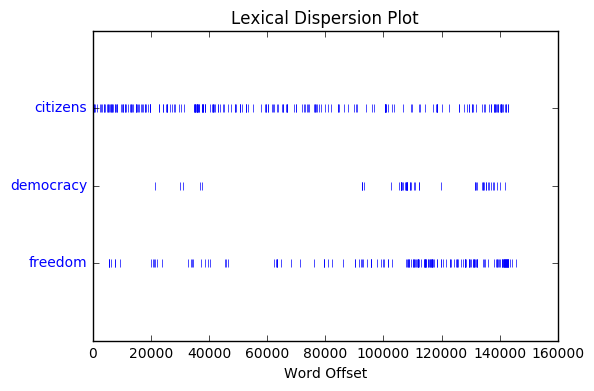

In [43]:
print(text4)
text4.dispersion_plot(['citizens','democracy','freedom'])

## 6. 文本特征处理

- 1.词袋模型
- 2.n-gram
- 3.TF-IDF

- 1.词袋模型
- 具体在案例中会应用

- 2.nltk中n gram处理

In [45]:
### nltk ngram处理
from nltk.book import *
from nltk import bigrams
bigrams = bigrams(text6)
bigramsDist = FreqDist(bigrams)
print(bigramsDist[("Sir", "Robin")])

from nltk import ngrams
fourgrams = ngrams(text6, 3)
fourgramsDist = FreqDist(fourgrams)
print(fourgramsDist[("father", "smelt", "of")])


18
1


- 利用sklearn做tfidf

In [8]:
from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer  

# 英文语料分词后
#corpus=["This is an apple and that is an orange",  
#        "If you want to eat an apple, just go and get it",  
#        "I went to Canada when you were in China"]
# 中文语料分词后
corpus=["我 喜欢 东方",
        "他 不是 一个 程序员",
        "小红 来自 浙江大学 的 博士"]

# 按照默认参数，将数据转为文档词矩阵
vectorizer=CountVectorizer()
# 计算TFIDF的权重值
transformer=TfidfTransformer()
# 文档词矩阵的计算，tf-idf的计算
tfidf=transformer.fit_transform(vectorizer.fit_transform(corpus))
# 文档词矩阵中的词
words=vectorizer.get_feature_names()
#文档词矩阵中词的权重
weights=tfidf.toarray()

print(words)
print(weights)

['一个', '不是', '东方', '博士', '喜欢', '小红', '来自', '浙江大学', '程序员']
[[ 0.          0.          0.70710678  0.          0.70710678  0.          0.
   0.          0.        ]
 [ 0.57735027  0.57735027  0.          0.          0.          0.          0.
   0.          0.57735027]
 [ 0.          0.          0.          0.5         0.          0.5         0.5
   0.5         0.        ]]


## 7. 主题模型

- 主题模型-隐因子模型

- 传统矩阵分解：特征值分解
- 奇异值分解
- 矩阵分解
- LSI(Latent Semantic Indexing)

- 矩阵分解：

![](./dataTm/work_pic/mf.png)

- LSI(Latent Semantic Indexing)

LSI：Latent Semantic Indexing的缩写，潜在语义索引

LSI使用SVD来对文档词矩阵进行分解。提取隐因子。可以将原来的数据映射到语义空间。

好处：文档词矩阵中看似不相似的两个文档，可能在语义空间里比较相似。同义词和多义词的存在影响类似向量空间模型的准确性。

- 文本相似度计算案例

In [9]:
### 假设我有一个文档，是中英文混合
documents = ['Hello, This is a pen and it is very useful',
             'This pencil is red and blue',
             'I love this pencil very much, because it is a gift from my friend.',
             u'我是一个中国人，我爱中国',
            u'我爱剪纸，这是一种传统文化']

In [10]:
type(documents)

list

In [11]:
### 我们来看看直接分词的结果，只是做了split操作
texts = [[word for word in document.lower().split()] for document in documents]

In [12]:
print(texts)

[['hello,', 'this', 'is', 'a', 'pen', 'and', 'it', 'is', 'very', 'useful'], ['this', 'pencil', 'is', 'red', 'and', 'blue'], ['i', 'love', 'this', 'pencil', 'very', 'much,', 'because', 'it', 'is', 'a', 'gift', 'from', 'my', 'friend.'], ['我是一个中国人，我爱中国'], ['我爱剪纸，这是一种传统文化']]


In [13]:
import nltk
import jieba
import jieba.analyse
from nltk.tokenize import word_tokenize

In [14]:
######## 试试nltk的简单功能
texts = u'Python is a very powerful programming language. 我们可以用它做很多事情.'
## 分句
sentences = nltk.sent_tokenize(texts)
print(sentences)
## 分词，然而也不支持中文
print("="*30)

words = []
for sentence in sentences:
    words.append(nltk.word_tokenize(sentence))
print(words)

['Python is a very powerful programming language.', '我们可以用它做很多事情.']
[['Python', 'is', 'a', 'very', 'powerful', 'programming', 'language', '.'], ['我们可以用它做很多事情', '.']]


In [19]:
# 去掉停用词，包括中文和英文
texts_tokenized = []
for document in documents:
    texts_tokenized_unit = []
    for word in word_tokenize(document):
        #texts_tokenized_unit += jieba.cut(word)
        texts_tokenized_unit += jieba.analyse.extract_tags(word, 5)
    texts_tokenized.append(texts_tokenized_unit)
    
texts_after_stopwords = texts_tokenized

In [18]:
### 中文也被分开
print(texts_after_stopwords)

[['Hello', ',', 'This', 'is', 'a', 'pen', 'and', 'it', 'is', 'very', 'useful'], ['This', 'pencil', 'is', 'red', 'and', 'blue'], ['I', 'love', 'this', 'pencil', 'very', 'much', ',', 'because', 'it', 'is', 'a', 'gift', 'from', 'my', 'friend', '.'], ['我', '是', '一个', '中国', '人', '，', '我', '爱', '中国'], ['我', '爱', '剪纸', '，', '这是', '一种', '传统', '文化']]


In [20]:
print(texts_after_stopwords)

[['Hello', 'pen', 'very', 'useful'], ['pencil', 'red', 'blue'], ['love', 'pencil', 'very', 'much', 'because', 'gift', 'my', 'friend'], ['中国', '一个'], ['剪纸', '传统', '文化', '这是', '一种']]


In [21]:
#########去除标点符号(观察上面的两个版本)
punctuations_list = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%']
texts_after_punct = [[word for word in document if not word in punctuations_list] for document in texts_after_stopwords]

In [22]:
print(texts_after_stopwords)

[['Hello', 'pen', 'very', 'useful'], ['pencil', 'red', 'blue'], ['love', 'pencil', 'very', 'much', 'because', 'gift', 'my', 'friend'], ['中国', '一个'], ['剪纸', '传统', '文化', '这是', '一种']]


In [23]:
###词干化
###Porter stemmer, Lancaster Stemmer 和 Snowball Stemmer词干算法
from nltk.stem.lancaster import LancasterStemmer
stemmerLS = LancasterStemmer()
texts_after_stemmed = [[stemmerLS.stem(word) for word in docment] for docment in texts_after_punct]

In [24]:
### 预处理完毕
texts_ready = texts_after_stemmed

In [82]:
### 为了方便使用，自定义一个预处理函数

In [25]:
def preProcess(documents):
    import nltk
    import jieba.analyse
    from nltk.tokenize import word_tokenize

# 去掉停用词，包括中文和英文   
    texts_tokenized = []
    for document in documents:
        texts_tokenized_unit = []
        for word in word_tokenize(document):
            #texts_tokenized_unit += jieba.cut(word)
            texts_tokenized_unit += jieba.analyse.extract_tags(word, 5)
    texts_tokenized.append(texts_tokenized_unit)
    
    texts_after_stopwords = texts_tokenized
#########去除标点符号
    punctuations_list = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%']
    texts_after_punct = [[word for word in document if not word in punctuations_list] for document in texts_after_stopwords]

###词干化
    from nltk.stem.lancaster import LancasterStemmer
    stemmerLS = LancasterStemmer()
    texts_after_stemmed = [[stemmerLS.stem(word) for word in docment] for docment in texts_after_punct]
    texts_ready = texts_after_stemmed
    return texts_ready

In [84]:
###获得的texts_ready是一个可以使用的语料库

In [85]:
###可以进行特征提取

In [86]:
###利用gensim来做tfidf，lsi，lda等

In [26]:
from gensim import corpora, models, similarities

d:\Users\data\Anaconda3\envs\py3_scrapy\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [27]:
###将准备好的语料喂给gensim，转换成字典
dictionary = corpora.Dictionary(texts_ready)

In [28]:
print(dictionary)
print(dictionary.token2id)

Dictionary(20 unique tokens: ['us', '文化', '中国', '传统', 'hello']...)
{'us': 0, '文化': 15, '中国': 13, '传统': 17, 'hello': 1, 'friend': 12, 'lov': 7, 'much': 8, 'gift': 9, 'red': 6, 'becaus': 10, '这是': 18, '一种': 19, 'blu': 4, 'pencil': 5, 'pen': 2, 'my': 11, 'very': 3, '一个': 14, '剪纸': 16}


In [29]:
###利用doc2bow()将语料转为词袋
corpus = [dictionary.doc2bow(text) for text in texts_ready]
###(word_id, word_frequency)
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1), (6, 1)], [(3, 1), (5, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(13, 1), (14, 1)], [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]]


In [30]:
###构建tfidf
#ifidf在这里可以理解成训练出来的模型
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
for i in corpus_tfidf:
    print(i)

[(0, 0.5484803253891997), (1, 0.5484803253891997), (2, 0.5484803253891997), (3, 0.31226270667960454)]
[(4, 0.6559486886294514), (5, 0.37344696513776354), (6, 0.6559486886294514)]
[(3, 0.22080307740481425), (5, 0.22080307740481425), (7, 0.3878341574301073), (8, 0.3878341574301073), (9, 0.3878341574301073), (10, 0.3878341574301073), (11, 0.3878341574301073), (12, 0.3878341574301073)]
[(13, 0.7071067811865476), (14, 0.7071067811865476)]
[(15, 0.447213595499958), (16, 0.447213595499958), (17, 0.447213595499958), (18, 0.447213595499958), (19, 0.447213595499958)]


In [33]:
### 利用LsiModel构建LSI模型
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=3)
lsi.print_topics(4)

[(0,
  '0.341*"pencil" + 0.338*"red" + 0.338*"blu" + 0.283*"very" + 0.261*"becaus" + 0.261*"much" + 0.261*"friend" + 0.261*"lov" + 0.261*"my" + 0.261*"gift"'),
 (1,
  '-0.413*"一种" + -0.413*"这是" + -0.413*"传统" + -0.413*"剪纸" + -0.413*"文化" + 0.273*"一个" + 0.273*"中国" + -0.000*"my" + -0.000*"friend" + -0.000*"gift"'),
 (2,
  '-0.421*"us" + -0.421*"pen" + -0.421*"hello" + 0.421*"blu" + 0.421*"red" + -0.240*"very" + 0.240*"pencil" + 0.000*"friend" + 0.000*"much" + 0.000*"becaus"')]

In [32]:
### 五篇文档和主题的相似程度
corpus_lsi = lsi[corpus_tfidf]
for doc in corpus_lsi:
    print(doc)

[(0, 0.4773390923970513)]
[(0, 0.57086815551175407)]
[(0, 0.74413914028751094)]
[(1, -0.90028421799911029), (2, -0.43530256927995525)]
[(1, -0.4353025692799552), (2, 0.90028421799911085)]


In [95]:
### 给定特定文档，给出相似程度？比如在搜索的时候？

In [34]:
### 建立索引index，类似建立字典
index = similarities.MatrixSimilarity(lsi[corpus])

In [35]:
### 新文档为'我爱五星红旗'
new_text = [u'我爱中国']
new_text_ready = preProcess(new_text)[0]

In [36]:
#词袋处理
new_bow = dictionary.doc2bow(new_text_ready)  

#依据lsi模型，计算相似度
new_lsi = lsi[new_bow]
similarity = index[new_lsi]

In [37]:
print(similarity)

[ 0.  0.  0.  1. -1.]


---------

- 主题模型LDA：
- 对文本信息的隐含主题进行挖掘建模的方法

思考：文章是如何产生的？
<br>首先选定主题（topic），再从主题中选取词（words），由这些词语再产生文章
<br>一篇文章有一定的主题分布
<br>我们可以根据这些主题的分布，将文章进行聚类或者分类

不同的使用者有不同的考虑角度，有的认为主题模型是一种聚类，有的认为是一种降维，有的认为是矩阵分解
<br>狭义上的主题模型，pLSA,LDA
<br>主题可以定义为语料中不断共现的模式
<br>一个效果好的主题模型，可以做到“西瓜“，”冬瓜”水果主题；“手枪”，“坦克”武器主题。
<br>模型算法需要做的就是将产生文章的过程反过来，由文章找出它的主题分布？有哪些主题？每个主题包含的词？
<br>应用：
<br>文章推荐， 任务匹配，更好了解文章描述的内容，自动产生文章

In [99]:
### 有很多办法可以抽取主题
### 比如TFIDF，进行关键字抽取，其实可以理解为主题抽取
### 矩阵分解，降维技术也可以，其实LDA的步骤中就隐含矩阵分解
### 我们可以理解LDA也是一种特殊的矩阵分解
### 我们将“文档-词矩阵”分解为“文档-主题“和“主题-词矩阵”
### 于是我们可以理解为一个文档，是由很多主题组成，形成分布；
### 一个主题由很多词组成，形成不同的分布，所以不同的主题词分布不同

### LDA只有矩阵分解还不够，LDA是利用抽样技术，将这两个矩阵进行不断更新。
### 初始状态只是初始分布
### 通过计算抽样和概率计算的方式---LDA算法趋于收敛
### 超参数alpha和beta
### 主题数
### 主题词（每个主题中的词的个数）
### 迭代次数

In [59]:
### 准备一个测试文档
doc1 = "Each player's score will be calculated by averaging his weighted rank from the fan votes, the player votes and the media votes."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "For the first time ever, NBA players and basketball media will join fans in selecting the starters for the NBA All-Star Game."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

# 组合文档
doc_complete = [doc1, doc2, doc3, doc4, doc5]

In [61]:
### 清洗和预处理
### 移除标点，停止词，词型规范

from nltk.corpus import stopwords                         #利用corpus导入停止词 
from nltk.stem.wordnet import WordNetLemmatizer           # 词型转换，词型还原
import string
stop = set(stopwords.words('english'))                   #定义停止词为英文
exclude = set(string.punctuation)                        # 定义移除标点
lemma = WordNetLemmatizer()                              #（根据词典）定义词型还原
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]

In [63]:
print(doc_clean)

[['player', 'score', 'calculated', 'averaging', 'weighted', 'rank', 'fan', 'vote', 'player', 'vote', 'medium', 'vote'], ['father', 'spends', 'lot', 'time', 'driving', 'sister', 'around', 'dance', 'practice'], ['doctor', 'suggest', 'driving', 'may', 'cause', 'increased', 'stress', 'blood', 'pressure'], ['first', 'time', 'ever', 'nba', 'player', 'basketball', 'medium', 'join', 'fan', 'selecting', 'starter', 'nba', 'allstar', 'game'], ['health', 'expert', 'say', 'sugar', 'good', 'lifestyle']]


In [64]:
### 准备文档词矩阵
### 一般文本挖掘都需要做的是将  text corpus 文档语料库  转换成 文档词矩阵
### LDA模型在文档词矩阵中进行模式发掘
### 我们这里利用gensim库来进行
### gensim库，需要额外安装，pip install gensim即可
### Topic modelling for humans

import gensim
from gensim import corpora

### 建立语料库中词的字典，每个唯一的词作为索引（可以认为是列名称）
dictionary = corpora.Dictionary(doc_clean)

### 将语料库转换成文档词矩阵
### 由于需要lemmatization，所以需要安装pattern库
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [65]:
### doc_clean 和 doc_term+matrix 是对照的，比如doc clean里有两个sugar，所以doc_term_matrix的第一项有（3,2）这项
print(doc_term_matrix)

[[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2)], [(9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(10, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(5, 1), (6, 1), (8, 1), (9, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1)], [(35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]]


In [66]:
print(dictionary)
print(type(dictionary))

Dictionary(41 unique tokens: ['good', 'ever', 'time', 'selecting', 'driving']...)
<class 'gensim.corpora.dictionary.Dictionary'>


In [67]:
### 利用gensim库创建一个LDA模型对象
Lda = gensim.models.ldamodel.LdaModel

### 在已知的文档词矩阵上训练LDA 模型
### 里面的参数分别是
### doc_term_matrix:文档词矩阵
### num_topics : 主题个数
### id2word:字典
### passes:迭代次数

### LDA模型可以对原有语料进行训练
### 同样可以对新的文档进行主题分布的推断
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

### 同样，你可以利用更新的文档进行训练LDA模型
#ldamodel.update(other_corpus)

In [68]:
### 结论
### 这里设置3个主题，每一行代表主题中的词和它的权重
### 通常会设置一个较大的主题数
### 默认的配置是print_topics(num_topics=20, num_words=10)
print(ldamodel.print_topics(num_topics=2, num_words=3))

[(1, '0.068*"say" + 0.068*"sugar" + 0.068*"health"'), (0, '0.059*"driving" + 0.059*"time" + 0.059*"sister"')]


In [110]:
### 如何提高主题模型的准确性
### 主题模型主要依赖于词的分布，作为文档词矩阵，词可以看做是feature
### 有一些做法可以提高主题模型的准确性
### 1. 词频过滤
### 利用探索性分析，获取文档词矩阵的词频，将词频较低的词去掉，注意和TF-IDF的区分
### 2. 词性标注过滤
### 词性标注（可用nltk, TextBlob SnowNLP等）
### 词性标注更关注上下文
### 虽然主题模型关注文档中的词，但是每个词不是平权的，比如以词性标注而言，标示为
# 词性标签 IN 标示介词或者连词 – “within”, “upon”, “except”. 
# 词性标签 CD 包含数字，比如 “one”,”two”, “hundred” “mid-1890” “nine-thirty”etc.
# 词性标签 MD 情态助动词 比如“may”, “must” etc. 
# 这些词更多的作为支撑文章的衔接词，如果考察文章的主题，我们可以去掉
### 3. 分割批量LDA
### 为了获得更好的效果，可以将语料进行分割，对每个分割的语料进行LDA训练，最后进行合并操作，交叉出现的主题词
### 可以更好描述整个语料的主题

-----------

## 8. 文本挖掘案例分析

- 针对IMDB电影评论进行情感分析

In [ ]:
### 一般而言目前有两种方法去做情感正负的极性分析（分类任务）
### 一种是基于词典的方法，我们在TextBlob的使用里提到
### 基于情感词典，各个词语有分数
### 对文章，句子进行打分
### 缺点：
### 1. 太固定，词语的情感和上下文相关，很多词语可以在不同的语言环境下表示不同的含义
### “讨厌，不理你啦”
### “严重同意你的说法哦”
### 2. 这个机器太垃圾 vs 垃圾分类处理的想法真棒
### 另一种是基于机器学习的方法：
### 通过训练语料，进行判别
### 可以利用多种机器学习模型的能力

### 下面的例子利用简单的机器学习模型进行情感分析（分类）

In [ ]:
### 首先，将获取的语料读取
### 一般而言，这个客户准备好或者爬虫爬取下来的excel，csv，json等文件
### 可以利用pandas进行读取的操作

In [38]:
# 导入pandas包
import pandas as pd

In [39]:
# 将movieReviews.tsv这个文件入读train DataFrame
# 我们目前使用的是movieReviews.tsv这个文件作为训练数据，tsv文件意味着这是一个tab分割的类csv文件
# 因此，我们将delimiter参数的值设置为\t
# header = 0在这里表示文件包含列名，在工作中，我们可以通过head查看文件或者直接尝试
# quoting=3参数表示忽略双引号
train = pd.read_csv("./dataTm/movieReviews/movieReviews.tsv", header=0, delimiter='\t', quoting=3)

In [40]:
type(train)

pandas.core.frame.DataFrame

In [41]:
# 对该数据框进行一下整体的了解
# 查看train数据的维度大小
train.shape

(25000, 3)

In [ ]:
### 这个一个25000个实例，三个特征的数据框

In [42]:
# 查看三个特征
train.columns.values

array(['id', 'sentiment', 'review'], dtype=object)

In [43]:
# 查看整个数据框的情况
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [44]:
# 由于我们做的是文本分析，所以需要具体查看一条review的情况
print(train["review"][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [ ]:
### 然而我们发现，review的质量不是很好，先不谈各种缩写、分隔符等，由于从互联网上直接采集，所以充斥着HTML的标签
### 我们需要对文本进行清洗和预处理的工作，第一步就是去除这些标签
### 我们在爬虫的部分提到，去除标签一般可以采取自定义正则表达式的方法，但是通常比较耗时，且容易出错
### 这里，我们继续利用能够很好处理类HTML结构信息的包BeautifulSoup

### 文本清洗及预处理

In [46]:
# 首先，导入BeautifulSoup
from bs4 import BeautifulSoup

In [47]:
# 在工作中，我们通常先对一条文本进行测试，再将方法应用到整个语料库
# 我们先对第一条评论进行处理
# 利用BeautifulSoup，清洗HTML标签
example1 = BeautifulSoup(train["review"][0], "html.parser")

In [48]:
# 下面打印出example1的内容，和之前的进行对比，会发现HTML标签已经不见
# 这里我们利用了BeautifulSoup的get_text()方法，获取example1对象的内容
print(example1.get_text())

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 mi

In [ ]:
### 下面我们将进一步清洗处理文本
### 现在遇到的问题是，文本分析中，我们更关注文章的关键信息，因此，我们需要将各类无关紧要的信息剔除
### 比如标点，数字，停止词等等
### 这里我们需要用到正则表达式和文本挖掘的专用包，在这个例子里我们使用NLTK

In [ ]:
### 需要注意的是在很多文本分析的工作中，比如我们的例子，情感正负极性分析
### 很多时候标点，数字是有用的
### 我们会更加具体的情况进行相应的处理，比如将标点表示成为单词，这种情况就需要具体问题具体分析

In [49]:
# 首先我们导入正则表达式模块
import re

In [50]:
# 我们利用正则表达式的sub函数，将不是字母的符号全部替换成空格
letters_only = re.sub("[^a-zA-Z]",
                      " ",
                      example1.get_text())
print(letters_only)

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    mi

In [51]:
# 忽略大小写的因素，我们将字符全部小写化
lower_case = letters_only.lower()

In [52]:
# 利用split()方法进行分词
# 这是英文天然的好处，词与词之间使用空格进行分割，如果是中文，那么需要先利用jieba这样的分词包进行分词
words = lower_case.split()

In [53]:
print(words)

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again', 'maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', 'moonwalker', 'is', 'part', 'biography', 'part', 'feature', 'film', 'which', 'i', 'remember', 'going', 'to', 'see', 'at', 'the', 'cinema', 'when', 'it', 'was', 'originally', 'released', 'some', 'of', 'it', 'has', 'subtle', 'messages', 'about', 'mj', 's', 'feeling', 'towards', 'the', 'press', 'and', 'also', 'the', 'obvious', 'message', 'of', 'drugs', 'are', 'bad', 'm', 'kay', 'visually', 'impressive', 'but', 'of', 'course', 'this', 'is', 'all', 'about', 

In [19]:
# 由于接下来要处理停止词之类的操作，我们需要利用到更加专业的自然语言处理包
# 导入NLTK
import nltk
# 注意：安装好NLTK之后，其实后续有很多的数据是没有安装的，建议利用下列命令，将所有的语料和字典等数据都安装
# nltk.download()

In [21]:
# 现在我们利用nltk的语料库导入停止词字典
# 在jieba等类似中文分词包中，我们可以按照类似方法调用字典或者自定义字典
from nltk.corpus import stopwords
#type(stopwords.words("english"))
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [22]:
# 利用stops停止词字典，对评论1进行去停止词的操作
stops = set(stopwords.words("english"))
meaningful_words = [w for w in words if not w in stops]
print(meaningful_words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [23]:
# 在上面的测试都通过之后，我们为了方便使用，将这一系列操作写成一个函数，供之后使用
def review_to_words(raw_review):
    # 去HTML标签
    review_text = BeautifulSoup(raw_review, 'lxml').get_text()
    # 去非字母符号
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    # 分词并小写化
    words = letters_only.lower().split()
    # 去停止词
    # 问题：为何要用set？
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return(" ".join(meaningful_words))

In [25]:
# 对评论1进行测试，查看效果
clean_review = review_to_words(train["review"][0])
#type(clean_review)
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [ ]:
### 下面，我们要将这些操作作用到所有的评论上，我们需要所有的评论作为训练数据

In [50]:
# 查看评论的数量
num_reviews = train["review"].size
print(num_reviews)

25000


In [51]:
# 创建一个空的list，我们的清洗之后的评论都是放在这里
clean_train_reviews = []

In [52]:
# 利用for循环，调用append方法不停将清洗之后的评论放入list
# 注意：由于是对25000个评论进行操作，这里可能会跑很长时间
for i in range(0, num_reviews):
    if ((i+1)%5000 == 0):
        print("已处理 %d 条评论 \n" % ( i+1 ))
    clean_train_reviews.append(review_to_words(train["review"][i]))

已处理 5000 条评论 

已处理 10000 条评论 

已处理 15000 条评论 

已处理 20000 条评论 

已处理 25000 条评论 



### 文本特征处理

In [53]:
len(clean_train_reviews)

25000

In [ ]:
### 利用词袋模型建立特征

In [ ]:
### 我们知道，只有这样的文本，计算机是无法学习的，我们要将文本转化为一种数字表示
### 词袋模型是最简单直接的处理方法，将文档词矩阵作为输出--一种数学表示方式
### feature vectors: {2,1,2,1,0,2}
### 例子

In [ ]:
### 这样操作有不有问题？

In [32]:
# 我们利用sklearn的特征提取模块，建立词袋模型下的特征表示
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
# 初始化CountVectorizer
# 这是一个词袋模型的工具
vectorizer = CountVectorizer(
    analyzer = "word", 
    tokenizer=None, 
    preprocessor=None, 
    stop_words=None,
    max_features=5000)

In [55]:
# 利用fit_transform进行模型训练，产生特征向量(feature vector)
# 注意：这里的输入需要是字符串列表
train_data_features = vectorizer.fit_transform(clean_train_reviews)

In [56]:
# 转成array，便于后续处理（数字）
train_data_features = train_data_features.toarray()

In [57]:
# 现在来看看我们的数据框，25000条评论，5000个特征
print(train_data_features.shape)

(25000, 5000)


In [2]:
# 训练完了之后，来看看有哪些词？
vocab = vectorizer.get_feature_names()
#print(vocab)

In [ ]:
### 同时可以看看各个词的词频

In [54]:
import numpy as np

In [3]:
dist = np.sum(train_data_features, axis = 0)

In [43]:
for tag, count in zip(vocab, dist):
    print(count)
    print(tag)

228
abandoned
161
abc
133
abilities
563
ability
1520
able
101
abraham
137
absence
95
absent
406
absolute
1794
absolutely
359
absurd
231
abuse
108
abusive
115
abysmal
350
academy
594
accent
254
accents
385
accept
157
acceptable
168
accepted
111
access
387
accident
236
accidentally
103
accompanied
148
accomplished
368
according
220
account
343
accurate
152
accused
214
achieve
169
achieved
153
achievement
98
acid
1186
across
1504
act
780
acted
7762
acting
4045
action
373
actions
99
activities
2862
actor
5386
actors
1470
actress
450
actresses
485
acts
942
actual
5078
actually
186
ad
348
adam
122
adams
557
adaptation
97
adaptations
180
adapted
961
add
535
added
201
adding
412
addition
394
adds
136
adequate
147
admire
733
admit
160
admittedly
121
adorable
618
adult
437
adults
120
advance
119
advanced
183
advantage
627
adventure
247
adventures
115
advertising
311
advice
112
advise
421
affair
108
affect
135
affected
127
afford
148
aforementioned
405
afraid
247
africa
312
african
218
afternoon


### 利用数字化的特征向量数据进行机器学习模型构建

In [ ]:
# 这里我们选择一个最通用的，同时性能不错的进行
# 我们选择的随机森林

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
# 简单起见，我们选择一个树的数量参数，选择100棵树作为参数（避免跑太慢）
forest = RandomForestClassifier(n_estimators=100)

In [59]:
### 注意，这个语句在训练模型，所以会运行时间较长
# 这里其实类似传统的机器学习任务，让机器跑即可
forest = forest.fit( train_data_features, train["sentiment"])

### 利用模型进行预测

In [ ]:
# 前面的读入数据的部分类似
# 注意：test数据不能训练，只是产生特征向量
# 过拟合
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

# 使用随机森林模型进行预测
result = forest.predict(test_data_features)

# 创建测试集的特征列，id和情感分析结论
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
#

-----------

## 9. 词云介绍

## 绘制词云

1. 安装词云工具：wordcloud
2. 安装中文分词工具：jieba

pip install wordcloud

conda install -c https://conda.anaconda.org/amueller wordcloud

http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud

In [56]:
#利用matplotlib绘制图形
import matplotlib.pyplot as plt
#利用wordcloud制作词云
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [57]:
#将需要制作的文本打开
text = open('ironman.txt').read()

In [58]:
#设置背景图片
backgroudImage = plt.imread('ironman1.jpeg')

In [59]:
wc = WordCloud(background_color="yellow",              #设置背景颜色
               max_words=50,                         #设置显示的最大词数
               mask=backgroudImage,                   #设置背景图片
               stopwords=STOPWORDS,                   #设置停用词
               max_font_size=500,                      #设置字体最大值
               random_state=30                        # 设置随机生成状态，即配色方案
              )

In [60]:
#产生词云
wc.generate(text)

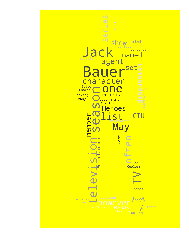

In [61]:
imageColors = ImageColorGenerator(backgroudImage)
wc.recolor(color_func = imageColors)
plt.imshow(wc)
#取消坐标轴
plt.axis('off')
plt.show()

## 绘制中文词云

1. 安装词云工具：wordcloud
2. 安装中文分词工具：jieba

In [62]:
#利用matplotlib库绘制词云
import matplotlib.pyplot as plt

In [63]:
#利用pickle进行中间文件存储
import pickle

In [64]:
#利用wordcloud制作词云
from wordcloud import WordCloud, STOPWORDS

In [65]:
#利用jieba进行中文分词
import jieba

In [71]:
#利用jieba进行分词，同时将输出文件利用pickle持久化存储备用
text = ''
with open('news.txt') as fileIn:
    for line in fileIn.readlines():
        line = line.strip('\n')
        text += ' '.join(jieba.cut(line))
        text += ' '
fileOut = open('text.pkl','wb')
pickle.dump(text,fileOut)
fileOut.close()

In [72]:
fileRead = open('text.pkl','rb')
text = pickle.load(fileRead)

In [73]:
wc = WordCloud( background_color = 'white',      # 设置背景颜色
                max_words = 200,                 # 设置最大现实的字数
                stopwords = STOPWORDS,           # 设置停用词
                font_path = 'C:/Users/Windows/fonts/msyh.ttf',           #设置字体格式，中文
                max_font_size = 50,              # 设置字体最大值
                random_state = 30,               # 设置随机生成状态，即配色方案
                )

In [74]:
#生成词云
wc.generate(text)

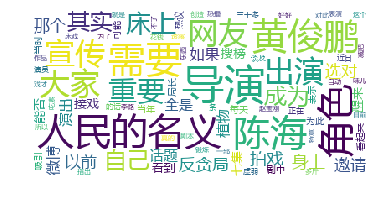

In [75]:
plt.imshow(wc)
#取消坐标，美化界面
plt.axis('off')
plt.show()

- [参考word cloud包](https://github.com/amueller/word_cloud)

### 组合练习(利用前面材料的代码段组合)

- 形成一个从豆瓣电影评论抓取数据，进行保存，读取，清洗，建模的文本分析整个过程

In [76]:
import urllib.request
import pandas as pd

csvList = []
for i in range(0, 100, 20):
    url = "https://movie.douban.com/subject/1292052/reviews?start=" + str(i)
    print(url)
    req = urllib.request.Request(url)
    content = urllib.request.urlopen(req)
    
    bs = BeautifulSoup(content.read(), 'html.parser')
    page = bs.select('div[class="short-content"]')
    # 请注意这里的元素的特点，利用contents提取，可以打开注释测试效果
    # 思考：为何不直接get_text?这样可以得到你希望的结果吗？
    #for i in page:
    #    print(i.contents[0].strip())


    for row in page:
        csvList.append(row.contents[0].strip())

output = pd.DataFrame({"id":csvList})
output.to_csv('./dataTm/doubanpd.csv')

https://movie.douban.com/subject/1292052/reviews?start=0
https://movie.douban.com/subject/1292052/reviews?start=20
https://movie.douban.com/subject/1292052/reviews?start=40
https://movie.douban.com/subject/1292052/reviews?start=60
https://movie.douban.com/subject/1292052/reviews?start=80


In [77]:
x = pd.read_csv('./dataTm/doubanpd.csv', encoding="gbk")
x.head()

,Unnamed: 0,id
0,0,{原文}：http://www.bighead.cn/?p=34 这些天按时上下班，衣...
1,1,NaN
2,2,周末看了一部美国影片《肖申克的救赎》（《The Shawshank Redemption》）...
3,3,Andy Dufresne，一个永垂电影史册的名字。 1 关于《The Shawshan...
4,4,一、缘起 从来没想过给《肖申克的救赎》写一篇影评，也许是生怕暴露自己只是个不谙世事的初级影...


In [78]:
# 观察数据，思考为何要这句？
# 使用参数axis=0,选择删除行
newpage = x.dropna(axis=0)

In [79]:
documents = newpage['id'].values.tolist()

In [80]:
import re
import nltk
import jieba
import jieba.analyse
from nltk.tokenize import word_tokenize

In [81]:
# 分词
texts_tokenized = []
for document in documents:
    texts_tokenized_unit = []
    for word in word_tokenize(document):
        #texts_tokenized_unit += jieba.cut(word)
        texts_tokenized_unit += jieba.analyse.extract_tags(word, 5)
    texts_tokenized.append(texts_tokenized_unit)
    
texts_after_stopwords = texts_tokenized

In [82]:
punctuations_list = ['...', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%', '']
texts_after_punct = [[word for word in document if not word in punctuations_list] for document in texts_after_stopwords]

In [ ]:
#print(texts_after_stopwords)

In [83]:
###词干化
###Porter stemmer, Lancaster Stemmer 和 Snowball Stemmer词干算法
from nltk.stem.lancaster import LancasterStemmer
stemmerLS = LancasterStemmer()
texts_after_stemmed = [[stemmerLS.stem(word) for word in docment] for docment in texts_after_punct]

In [84]:
doc_clean = texts_after_stemmed

In [85]:
print(doc_clean)

[['原文', 'http', 'cn', 'bighead', 'www', '34', '肖申克', '衣冠楚楚', '救赎', '与时俱进', '低落', '距离', 'frank', 'darabont', '聒噪', '缔造', '抱歉', '想必', '美好'], ['肖申克', '救赎', '周末', '影片', '一部', 'shawshank', 'redempt', '牢中', '冤案', '追寻', '入狱', '银行家', '影片', '感受', '改变现状', '毅力', '才华'], ['andy', '永垂', 'dufresn', '史册', '电影', '名字', '关于', 'shawshank', '千万遍', '拾人牙慧', 'redempt', '新意', '单词'], ['缘起', '肖申克', '故作高深', '多地', '重感冒', '不谙世事'], ['体制', '时兴', '好象', '分为', '比较', '优越感', '体制', '某种', '通常', '人格', '实际上', '独立', '似乎', '自己', '体制', '很少', '愿意', '真正', '还是', '余杰', '国家图书馆', '差一点', '硕士', '北大', '体制', '文章', '比较', '一些', '由于', '最后', '还是'], ['极端', '头牌', '豆瓣', '这部', '一颗', '不错', '彼处', 'n年', '观影', '真不错', '第一次'], ['片尾', '字幕', '一行', '记得', '是否', 'mem', 'al', 'green', '翻译成', '中文', '就是', 'al', '纪念', 'green', 'al', 'frank', '肖申克', 'green', '救赎', '编导', 'darabont', '经纪人', '影片', '完成', 'aid', '并发症', '死于', '前夕', '囚车', '囚犯', '嘲笑', '监狱', '人群'], ['笼中鸟', '勒下', '肖申克', '越紧', '救赎', '电影', '钢琴师', '1900', '观影', '两部'], ['成就', '而活', '20', '沉沦', '游戏规则'], ['罪恶',

In [86]:
import gensim
from gensim import corpora

### 建立语料库中词的字典，每个唯一的词作为索引（可以认为是列名称）
dictionary = corpora.Dictionary(doc_clean)

### 将语料库转换成文档词矩阵
### 由于需要lemmatization，所以需要安装pattern库
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [87]:
Lda = gensim.models.ldamodel.LdaModel


ldamodel = Lda(doc_term_matrix, num_topics=6, id2word = dictionary, passes=50)

In [88]:
print(ldamodel.print_topics(num_topics=6, num_words=10))

[(0, '0.055*"肖申克" + 0.031*"救赎" + 0.021*"电影" + 0.010*"片子" + 0.007*"20" + 0.007*"这部" + 0.007*"一部" + 0.007*"希望" + 0.005*"我们" + 0.005*"没有"'), (1, '0.011*"体制" + 0.011*"救赎" + 0.009*"时间" + 0.009*"al" + 0.009*"激動" + 0.009*"green" + 0.009*"肖申克" + 0.006*"监狱" + 0.006*"shawshank" + 0.006*"get"'), (2, '0.015*"red" + 0.012*"肖申克" + 0.009*"老布" + 0.009*"freem" + 0.009*"andy" + 0.009*"morg" + 0.006*"darabont" + 0.006*"frank" + 0.006*"man" + 0.006*"tim"'), (3, '0.016*"安迪" + 0.016*"监狱" + 0.015*"肖申克" + 0.013*"电影" + 0.010*"救赎" + 0.008*"影片" + 0.008*"them" + 0.008*"感受" + 0.005*"入狱" + 0.005*"自由"'), (4, '0.023*"thing" + 0.015*"andy" + 0.015*"hop" + 0.015*"good" + 0.010*"肖申克" + 0.010*"救赎" + 0.009*"电影" + 0.009*"希望" + 0.006*"dufresn" + 0.006*"red"'), (5, '0.019*"救赎" + 0.019*"肖申克" + 0.011*"电影" + 0.011*"自由" + 0.011*"andy" + 0.008*"生命" + 0.008*"监狱" + 0.008*"red" + 0.008*"希望" + 0.004*"阿甘"')]
